# Project: Recomendation for AI development setup.

At our group, we want to start AI development. We usually use Matlab in order to write algorithms. And Windows is often used.
We don´t use a version management tool at the moment. 
Therefore we want to answer following questions:

1) Witch operating system is most adequate?

2) Does Matlab fits as AI programming language?

3) Witch code editors are more appropiated?

4) Witch AI libraries should we use?

5) Witch version managment is recomended?

In this notebook we use the data of the stack overflow survey 2022 in order to answer our questions:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from collections import defaultdict

%matplotlib inline

# Extract the necessary data

In [2]:
# Load public data of the stack overflow survey 2022 (https://insights.stackoverflow.com/survey)
columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
df = pd.read_csv('C:/Jose/02_OverflowSurvey/survey_results_public.csv', usecols = columns_of_interest)

In [ ]:
show_all_data = False # Define if we want to display the hole dataframe (takes some time)
if show_all_data == True:
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
else:
    pd.set_option('display.max_rows', 10)
    pd.set_option('display.max_columns', 10)
    pd.set_option('display.width', 100)
    pd.set_option('display.max_colwidth', 100)

#Show dataset
df

In [ ]:
# Show all the columns
print(df.columns.tolist())

# Selecting columns of interest

After looking at the hole columns descriptions, and the data, the columns of interest for our questions are:

Columns of interest:

'MainBranch': Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."

'Employment': Which of the following best describes your current employment status?

'YearsCode': Including any education, how many years have you been coding in total?

'WorkExp': How many years of working experience do you have?

'DevType': Which of the following describes your current job? Please select all that apply.

'OrgSize': Approximately how many people are employed by the company or organization you currently work for?

'LanguageHaveWorkedWith': Which programming, scripting, and markup languages have you done extensive development work in over 
the past year

'MiscTechHaveWorkedWith': Which other frameworks and libraries have you done extensive development work in over the past year

'NEWCollabToolsHaveWorkedWith': Which development environments did you use regularly over the past year

'OpSysProfessional use': What is the primary operating system in which you work?

'OpSysPersonal use'

'VersionControlSystem': What are the primary version control systems you use?

'VCInteraction': How do you interact with your version control system?

'OfficeStackAsyncHaveWorkedWith': Which collaborative work management tools did you use regularly over the past year, and which do you want to work with over the next year?

'Age': Age

# Cleaning and preparing the data

In [3]:
# Change the column 'WorkExp' to string type
df['WorkExp'] = df['WorkExp'].astype(str)
column_data = df['WorkExp']
print(column_data)

0         nan
1         nan
2         nan
3         nan
4         nan
         ... 
73263     5.0
73264     6.0
73265    42.0
73266     nan
73267     nan
Name: WorkExp, Length: 73268, dtype: object


In [64]:
def generate_column_element_set (df, columns_of_interest):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    columns_of_interest - list of the column names you want to look through

    OUTPUT:
    set_dictionary - a dictionary with the column, and the element set for each column
    '''
    set_dictionary = { }
    for selected_column in columns_of_interest:
        column_data = df[selected_column].dropna()
        whole_elements = []
        for row in column_data:
            row_elements = row.split(';')
            for string in row_elements:
                whole_elements = whole_elements + [string.strip()]
        possible_vals = set(whole_elements)
        print ('Column <',selected_column,'> has following data: ',possible_vals,'\n')
        set_dictionary.update({selected_column : possible_vals})
        #print (set_dictionary)
    return (set_dictionary)

In [ ]:
load = True # Indicates if we generate the dictionary from the data (it takes a lot of time), or we load it from a file where it was once generated.

if (load == False):
    # generate the dictionary set
    column_element_set_dictionary = generate_column_element_set(df, columns_of_interest)
    print (column_element_set_dictionary)
    # Save dictionary to a file
    np.save('column_element_set_dictionary.npy', column_element_set_dictionary)
    print ('column_element_set_dictionary saved to a file')
else:
    # Load the dictionary from the file (in order to save the processing time)
    column_element_set_dictionary = np.load('column_element_set_dictionary.npy',allow_pickle='TRUE').item()
    for selected_column in columns_of_interest:
        print ('Column <',selected_column,'> has following data: ',column_element_set_dictionary[selected_column],'\n')

## Selecting interesting column elements

After processing all the interesting columns, we have the following dictionaries for each column.
I marked the interesting items of the different dictionaries.

Column **< MainBranch >** has following data:  {'I am not primarily a developer, but I write code sometimes as part of my work', 'I am learning to code', 'None of these', 'I code primarily as a hobby', 'I am a developer by profession', 'I used to be a developer by profession, but no longer am'}

Column **< Employment >** has following data:  {'Not employed, but looking for work', 'Employed, part-time', 'Employed, full-time', 'Not employed, and not looking for work', 'Independent contractor, freelancer, or self-employed', 'I prefer not to say', 'Retired', 'Student, full-time', 'Student, part-time'}

Column **< YearsCode >** has following data:  {'20', '14', '26', '35', '34', 'More than 50 years', '23', '4', '38', '1', '21', '22', '18', '49', '40', '29', '43', '46', '6', '28', '7', '16', '19', '30', '10', 'Less than 1 year', '42', '2', '31', '13', '44', '17', '24', '48', '33', '11', '3', '50', '45', '25', '27', '39', '12', '47', '41', '8', '15', '5', '9', '32', '37', '36'}

Column **< WorkExp >** has following data:  {'25.0', '48.0', '21.0', '46.0', '30.0', '24.0', '38.0', '28.0', '9.0', '23.0', '35.0', '5.0', '4.0', '14.0', '0.0', '33.0', '29.0', '40.0', '19.0', '34.0', '6.0', '26.0', 'nan', '41.0', '8.0', '22.0', '45.0', '15.0', '42.0', '50.0', '49.0', '7.0', '18.0', '2.0', '11.0', '39.0', '44.0', '12.0', '16.0', '37.0', '1.0', '17.0', '31.0', '36.0', '10.0', '20.0', '47.0', '32.0', '27.0', '43.0', '3.0', '13.0'}

Column **< DevType >** has following data:  {'Designer', 'Senior Executive (C-Suite, VP, etc.)', 'Engineer, data', 'Developer, game or graphics', 'System administrator', 'Educator', 'Academic researcher', 'Developer, full-stack', 'Blockchain', 'Project manager', 'Scientist', 'Data or business analyst', 'Student', 'Engineering manager', 'DevOps specialist', 'Product manager', 'Developer, front-end', 'Developer, mobile', **'Data scientist or machine learning specialist'**, 'Developer, QA or test', 'Security professional', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Other (please specify):', 'Database administrator', 'Engineer, site reliability', 'Developer, back-end', 'Cloud infrastructure engineer', 'Marketing or sales professional'}

Column **< OrgSize >** has following data:  {'1,000 to 4,999 employees', 'Just me - I am a freelancer, sole proprietor, etc.', '20 to 99 employees', '100 to 499 employees', '5,000 to 9,999 employees', 'I don’t know', '500 to 999 employees', '10,000 or more employees', '2 to 9 employees', '10 to 19 employees'}

Column **< LanguageHaveWorkedWith >** has following data:  {'Julia', **'Python'**, 'Rust', 'Elixir', 'JavaScript', 'F#', 'Ruby', 'Dart', 'Clojure', 'Go', 'COBOL', 'C++', **'MATLAB'**, 'Haskell', 'Assembly', 'Fortran', 'Groovy', 'SQL', 'SAS', 'Erlang', 'Lua', 'Scala', 'C', 'OCaml', 'HTML/CSS', 'Solidity', 'Kotlin', 'TypeScript', 'C#', 'Delphi', 'Objective-C', 'APL', 'Perl', 'LISP', 'Java', 'Swift', 'Crystal', 'PowerShell', 'PHP', 'Bash/Shell', 'VBA', 'R'}

Column **< MiscTechHaveWorkedWith >** has following data:  {'Electron', **'TensorFlow'**, 'Qt', 'Tidyverse', 'Apache Kafka', 'Hugging Face Transformers', 'Apache Spark', 'Cordova', 'Xamarin', 'Hadoop', **'NumPy'**, **'Scikit-learn'**, 'React Native', 'Capacitor', **'Pandas'**, 'Spring', 'Uno Platform', **'Torch/PyTorch'**, 'Ionic', 'GTK', 'Flutter', **'Keras'**, '.NET'}

Column **< NEWCollabToolsHaveWorkedWith >** has following data:  {'Spyder', 'Xcode', 'RAD Studio (Delphi, C++ Builder)', 'Rider', 'Android Studio', 'Visual Studio Code', **'Notepad++'**, 'TextMate', **'IPython/Jupyter'**, 'PhpStorm', 'Sublime Text', 'RStudio', 'GoLand', 'Webstorm', 'Vim', 'Nano', 'Visual Studio', **'PyCharm'**, 'Atom', 'Neovim', 'IntelliJ', 'CLion', 'NetBeans', 'Emacs', 'RubyMine', 'Eclipse', 'Qt Creator'}

Column **< OpSysProfessional use >** has following data:  {'Other (please specify):', 'Linux-based', **'Windows'**, 'BSD', 'macOS', 'Windows Subsystem for Linux (WSL)'}

Column **< OpSysPersonal use >** has following data:  {'Other (please specify):', 'Linux-based', **'Windows'**, 'BSD', 'macOS', 'Windows Subsystem for Linux (WSL)'}

Column **< VersionControlSystem >** has following data:  {'Mercurial', **'Git'**, 'Other (please specify):', **'SVN'**, **"I don't use one"**}

Column **< VCInteraction >** has following data:  {'Code editor', 'Dedicated version control GUI application', **'Command-line'**, 'Version control hosting service web GUI'}

Column **< OfficeStackAsyncHaveWorkedWith >** has following data:  {'DingTalk (Teambition)', 'Microsoft Planner', 'Adobe Workfront', 'Stack Overflow for Teams', 'Trello', **'Confluence'**, 'monday.com', 'Wimi', 'Swit', 'Wrike', 'Planview Projectplace or Clarizen', 'Smartsheet', 'Notion', 'Airtable', 'ClickUp', **'Jira Work Management'**, 'Workzone', 'Cerri', 'Microsoft Lists', 'Leankor', 'Asana'}

Column **< Age >** has following data:  {'65 years or older', '45-54 years old', '18-24 years old', '35-44 years old', '55-64 years old', '25-34 years old', 'Prefer not to say', 'Under 18 years old'}

Now lets plot each column data and coment the information there

In [104]:
def generate_flag_for_column_element (df, selected_column, element, flag_column_name):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    selected_column - column names you want to look through
    element - element to look in the selected column
    flag_column_name - name of the new column where 

    OUTPUT:
    dataframe - a new dataframe with the new flag column included
    '''

    # Generate the new column
    df[flag_column_name] = False # Default value is False

    for index, row in df.iterrows():
        row_column_elements = str(row[selected_column]).split(';')
        for string in row_column_elements:
            if element == string.strip():
                #print ('Element <',element,'> found in row')
                df.loc[index,[flag_column_name]] = True
    return (df)

def generate_flag_for_column_several_elements (df, selected_column, element_list, flag_column_name):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    selected_column - column names you want to look through
    element_list - element list to look in the selected column
    flag_column_name - name of the new column where 

    OUTPUT:
    dataframe - a new dataframe with the new flag column included where element1 or element2 is present
    '''

    # Generate the new column
    df[flag_column_name] = False # Default value is False

    for index, row in df.iterrows():
        row_column_elements = str(row[selected_column]).split(';')
        for string in row_column_elements:
            for element in element_list:
                if (element == string.strip())  :
                    df.loc[index,[flag_column_name]] = True
    return (df)

def generate_flag_for_column_several_columns (df, column_list, element, flag_column_name):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    column_list - column names list you want to look through
    element - element to look in the selected column
    flag_column_name - name of the new column where 

    OUTPUT:
    dataframe - a new dataframe with the new flag column included
    '''

    # Generate the new column
    df[flag_column_name] = False # Default value is False

    for index, row in df.iterrows():
        for selected_column in column_list:
            row_column_elements = str(row[selected_column]).split(';')
            for string in row_column_elements:
                if element == string.strip():
                    #print ('Element <',element,'> found in row')
                    df.loc[index,[flag_column_name]] = True
    return (df)


In [5]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row, add the devs
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    #clean up the resulting dataframe8
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

def count_plot(df, column, possible_vals, rotation=90, size=5):
    '''
    INPUT
        df - a dataframe holding the CousinEducation column
        column - column to plot
        possible_vals - values of column
        rotation - x axis labels rotation
        size - grafic size

    OUTPUT
        Displays a plot related to column
    '''
    study = df[column].value_counts().reset_index()
    study.rename(columns={'index': 'method', column: 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)

    (100*study_df/study_df.sum()).plot(kind='bar', legend=None, figsize = (size,size));
    plt.ylabel('proportion (%) of each option in the data')
    plt.xlabel('options in the column data')
    plt.xticks(rotation=rotation)
    plt.title('Analysis of column <'+column+'>');
    plt.show()

    return

# Results evaluation

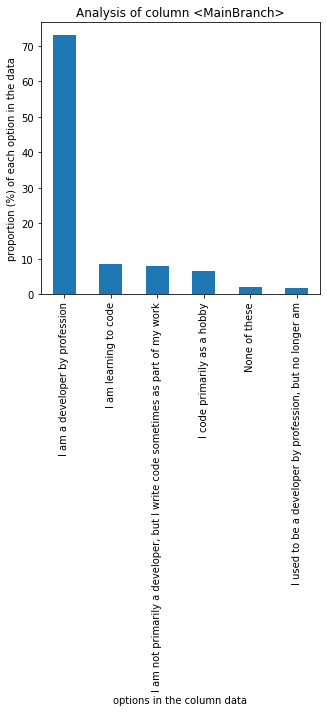

In [6]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'MainBranch'
count_plot(df, selected_column, column_element_set_dictionary[selected_column])

We see that more than 70% of the entries are done by professional developers. This is the group we are looking for our question. Therefore we generate a new boolean column where the entries with this characteristic is marked.

In [20]:
# Generate a flag for the rows with "profesional developers"
selected_column = 'MainBranch'
element_to_flag = 'I am a developer by profession'
flag_column_name = 'dev_prof'
df = generate_flag_for_column_element(df,selected_column,element_to_flag, flag_column_name)

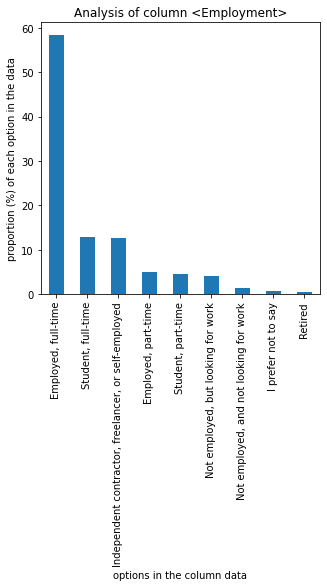

In [25]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'Employment'
count_plot(df, selected_column, column_element_set_dictionary[selected_column])

Almost 60% of the entries are full time employies. In second place, full-time students and freelancer with each above 10% are important groups

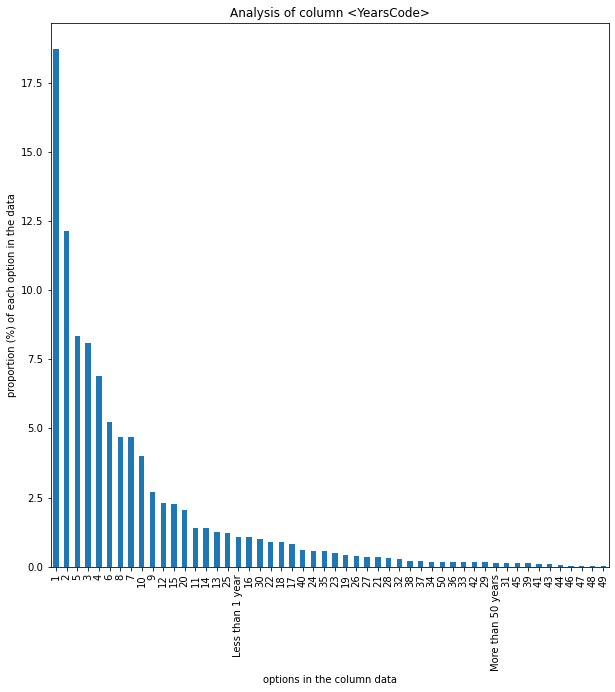

In [27]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'YearsCode'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], size=10)

We see that the biggest group of entries are of people coding less than 10 years.

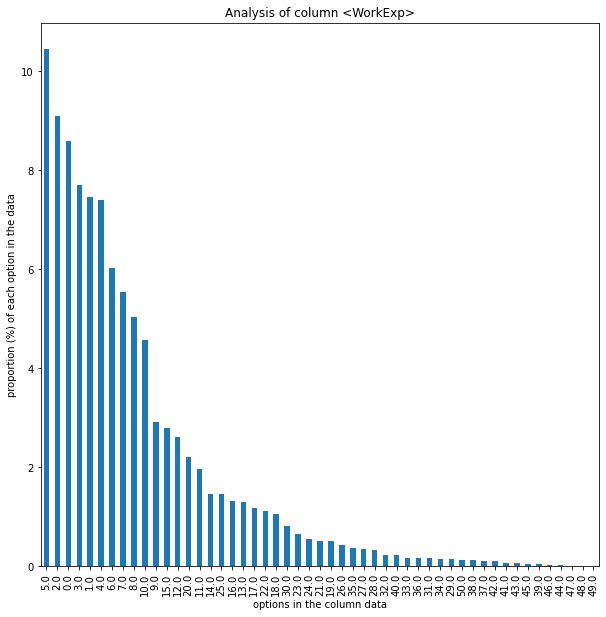

In [35]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'WorkExp'
count_plot(df[df[selected_column] != 'nan'], selected_column, column_element_set_dictionary[selected_column], size=10) #df_wihtoutnans = df[df[selected_column] != 'nan']

Here also the group of people with less than 10 years work experience are the biggest group.

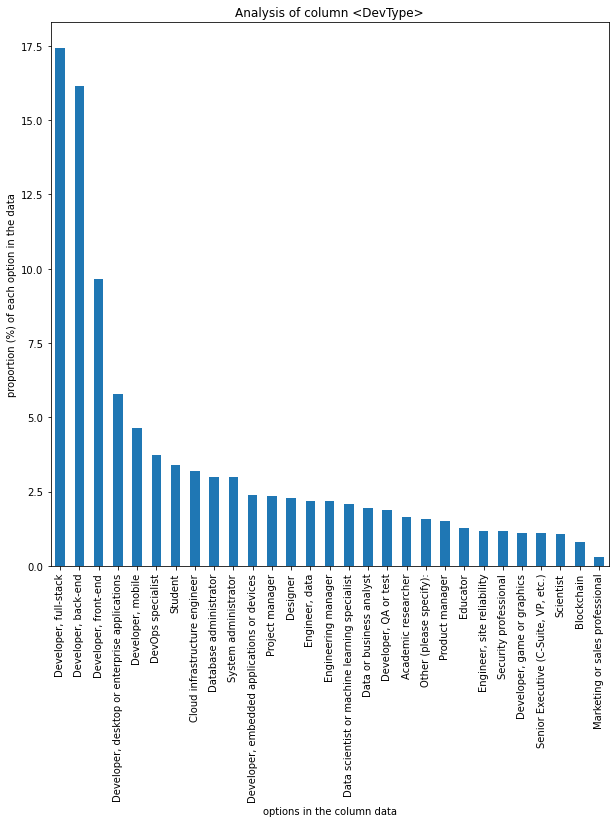

In [36]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'DevType'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], size=10)

Most of the entries are really developers of production code.
For our question it is important to define the group working on data science and machine learning. Therefore we generate a column flag for this.


In [116]:
# Generate a flag column
selected_column = 'DevType'
element_to_flag = 'Data scientist or machine learning specialist'
flag_column_name = 'ML'
df = generate_flag_for_column_element(df,selected_column,element_to_flag, flag_column_name)

In [117]:
# Count proportion of entries
print ('There are ',round (100 * df[df['ML']==True].shape[0]/ df.shape[0], 2),'% people that work on ML.')

There are  4.67 % people that work on ML.


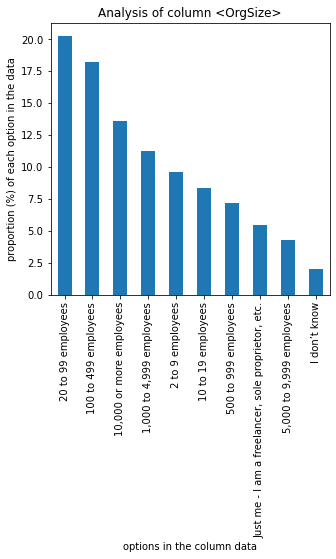

In [39]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'OrgSize'
count_plot(df, selected_column, column_element_set_dictionary[selected_column])

The size of the company is distributed. We can not identify a clear pattern.

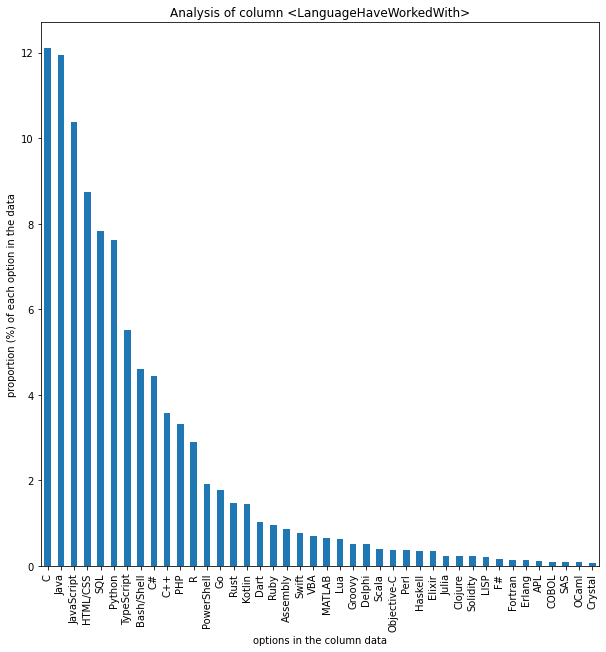

In [38]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'LanguageHaveWorkedWith'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], size=10)

This is a very interessting data for our questions. 
We see that most of the people work on C and Java. The second group focus on web coding with JavaScript and HTML/CSS.
We are interested in the group of people working on Python or MATLAB. Therefore we generate a flag for both groups.

In [47]:
# Generate a flag for the rows with "python and Matlab"
selected_column = 'LanguageHaveWorkedWith'
element_to_flag = 'Python'
flag_column_name = 'Python'
df = generate_flag_for_column_element(df,selected_column,element_to_flag, flag_column_name)
element_to_flag = 'MATLAB'
flag_column_name = 'MATLAB'
df = generate_flag_for_column_element(df,selected_column,element_to_flag, flag_column_name)

In [58]:
# Count proportion of entries
print ('There are ',round (100 * df[df['Python']==True].shape[0]/ df.shape[0], 2),'% people on the survey that work with python.')
print ('There are ',round (100 * df[df['MATLAB']==True].shape[0]/ df.shape[0], 2),'% people on the survey that work with Matlab.')

There are  46.62 % people on the survey that work with python.
There are  3.98 % people on the survey that work with Matlab.


There are almost 50% of people that work with python.
And only 4% working with Matlab.

Now look only at the group of people that declare to be data scientists or work with machine learning.

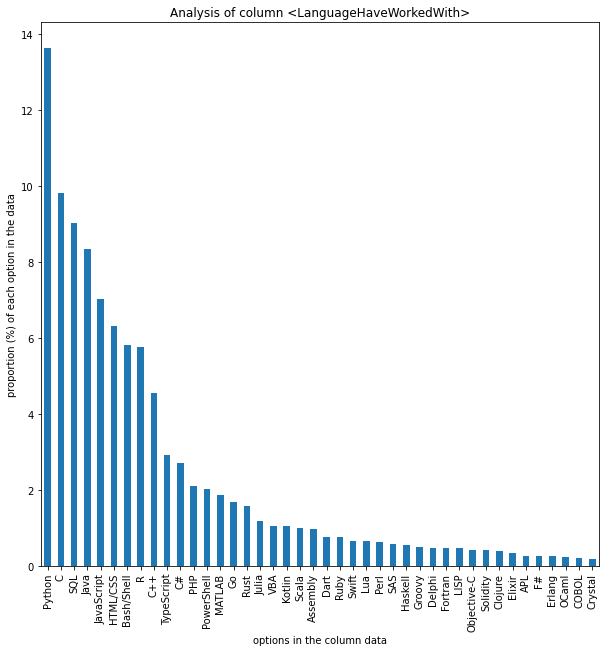

In [118]:
selected_column = 'LanguageHaveWorkedWith'
count_plot(df[df['ML']==True], selected_column, column_element_set_dictionary[selected_column], size=10)

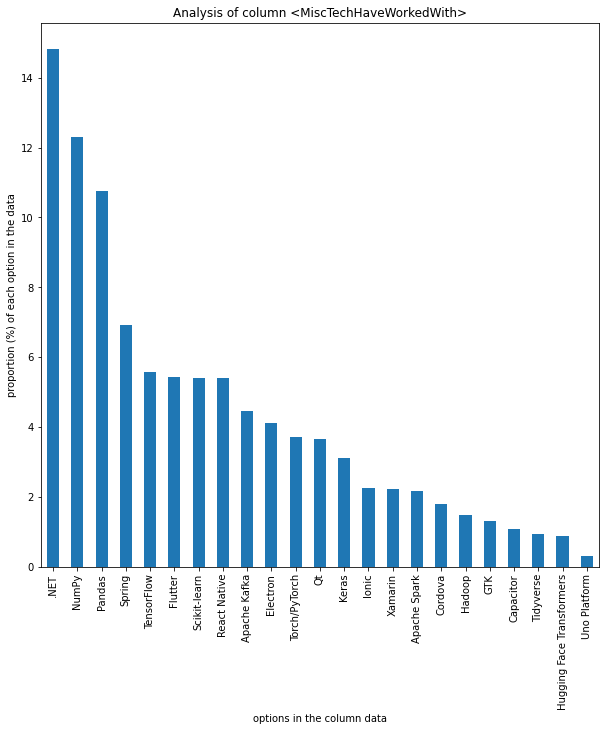

In [59]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'MiscTechHaveWorkedWith'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], size=10)

For our questions it is interesting to know the people working with AI related tools. We identify ['TensorFlow','Scikit-learn', 'Torch/PyTorch', 'Keras'] as elements that are related to it. So let generate a column flag that select the entries with one of this elements.

In [63]:
# Generate a flag column.
selected_column = 'MiscTechHaveWorkedWith'
element_list_to_flag = ['TensorFlow','Scikit-learn', 'Torch/PyTorch', 'Keras']
flag_column_name = 'ai'
df = generate_flag_for_column_several_elements(df, selected_column, element_list_to_flag, flag_column_name)

In [65]:
# Count proportion of entries
print ('There are ',round (100 * df[df['ai']==True].shape[0]/ df.shape[0], 2),'% people on the survey that work with ai libraries/tools.')

There are  12.96 % people on the survey that work with ai libraries/tools.


It is a relevant group of people (nearly 13%) working with ai related tools.

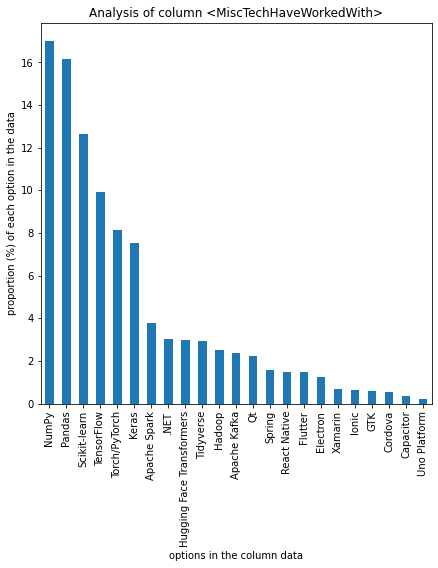

In [126]:
selected_column = 'MiscTechHaveWorkedWith'
count_plot(df[df['ML']==True], selected_column, column_element_set_dictionary[selected_column], size=7)

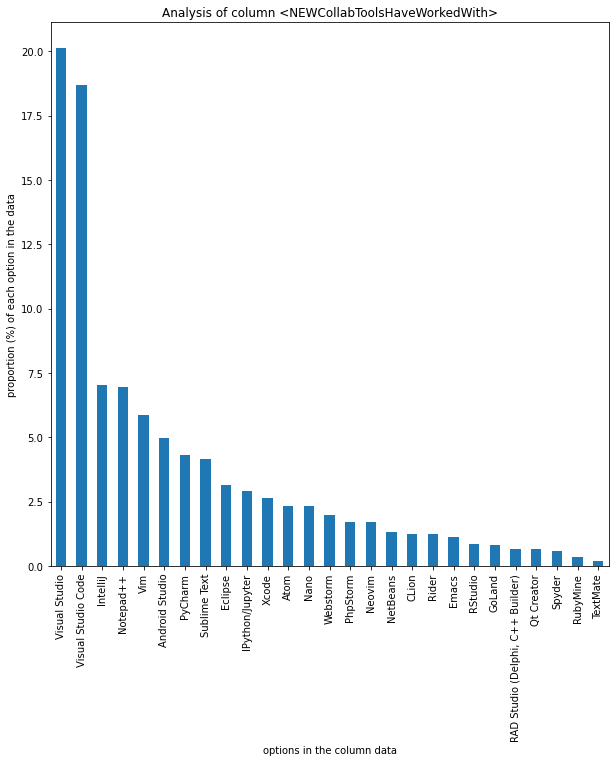

In [66]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'NEWCollabToolsHaveWorkedWith'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], size=10)

For our questions it is relevant the users working with PyCharm and Jupyter. Therefore let´s create a flag columns for this two groups.

In [76]:
# Generate a flag column.
selected_column = 'NEWCollabToolsHaveWorkedWith'
element_list_to_flag = ['IPython/Jupyter']
flag_column_name = 'Jupyter'
df = generate_flag_for_column_several_elements(df, selected_column, element_list_to_flag, flag_column_name)
element_list_to_flag = ['PyCharm']
flag_column_name = 'PyCharm'
df = generate_flag_for_column_several_elements(df, selected_column, element_list_to_flag, flag_column_name)

In [77]:
# Count proportion of entries
print ('There are ',round (100 * df[df['Jupyter']==True].shape[0]/ df.shape[0], 2),'% people on the survey that work with Jupyter.')
print ('There are ',round (100 * df[df['PyCharm']==True].shape[0]/ df.shape[0], 2),'% people on the survey that work with PyCharm.')

There are  11.18 % people on the survey that work with Jupyter.
There are  16.59 % people on the survey that work with PyCharm.


There would be interesting if the people using Jupyter, also program with Python (it sould be)

In [92]:
print ('There are ',round (100 * df[((df['Jupyter']==True) & (df['Python']==True))].shape[0]/ df[df['Python']==True].shape[0], 2),'% people working with Python, uses Jupyter.')
print ('There are ',round (100 * df[((df['PyCharm']==True) & (df['Python']==True))].shape[0]/ df[df['Python']==True].shape[0], 2),'% people working with Python, uses PyCharm.')

There are  22.27 % people working with Python, uses Jupyter.
There are  31.73 % people working with Python, uses PyCharm.


But then, what tool uses the rest of the people working with Python?
Lets find it out.

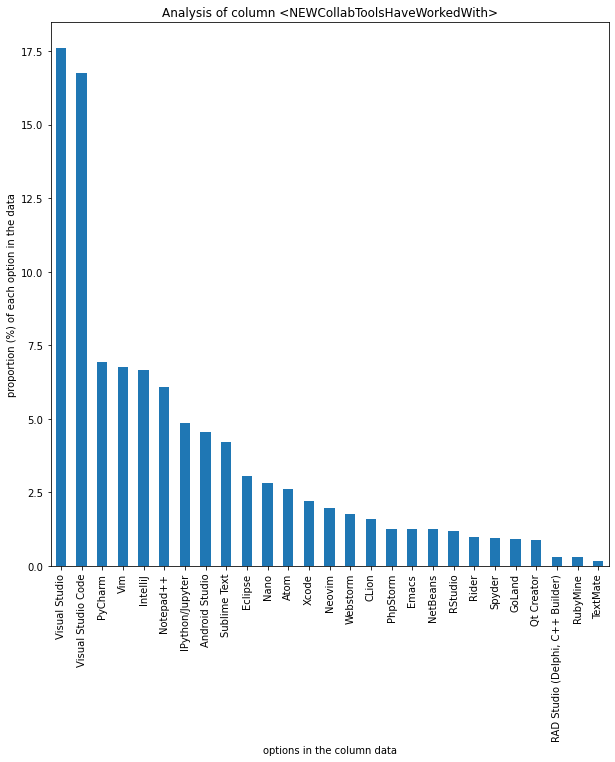

In [93]:
selected_column = 'NEWCollabToolsHaveWorkedWith'
count_plot(df[df['Python']==True], selected_column, column_element_set_dictionary[selected_column], size=10)

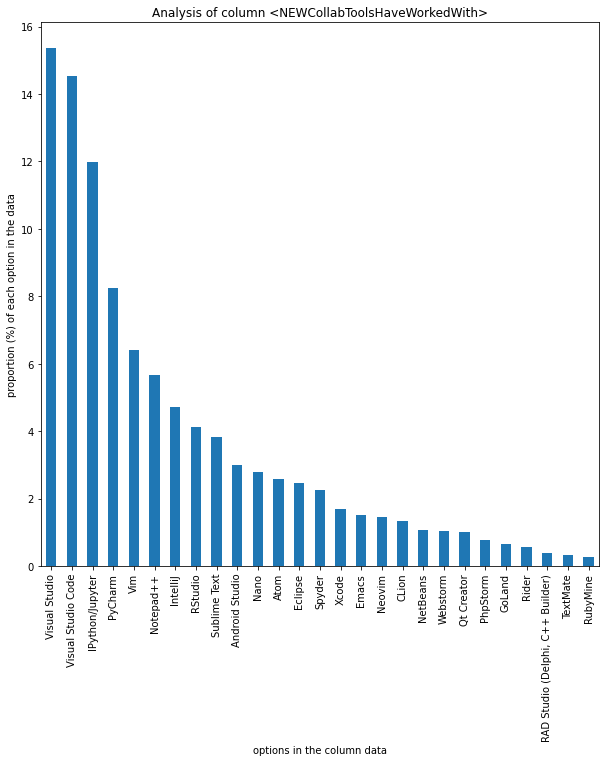

In [121]:
selected_column = 'NEWCollabToolsHaveWorkedWith'
count_plot(df[(df['Python']==True) & (df['ML']==True)], selected_column, column_element_set_dictionary[selected_column], size=10)

Very intersting. Most of the people working with Python, use Visual Studio. Then comes PyCharm. And Jupyter is at the 7th place.

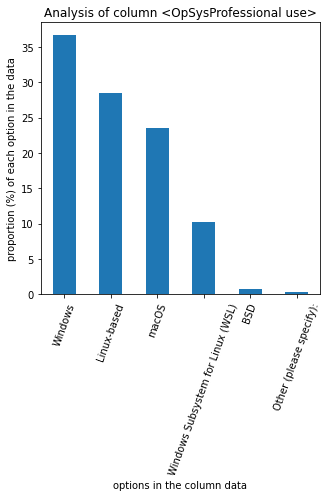

In [100]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'OpSysProfessional use'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], rotation=70)

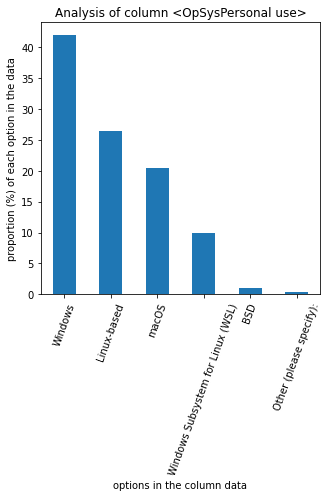

In [101]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'OpSysPersonal use'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], rotation=70)

Most of the people uses windows for both professional and personal use.
The operating system is important for our question. Therefore let generate a flag for this.

In [105]:
# Generate a flag column.
column_list = ['OpSysProfessional use', 'OpSysPersonal use']
element_to_flag = 'Windows'
flag_column_name = 'Windows'
df = generate_flag_for_column_several_columns(df, column_list, element_to_flag, flag_column_name)

It would be interesting for me to know how many people working with python use windows. Lets chek it.

In [107]:
print ('There are ',round (100 * df[((df['Windows']==True) & (df['Python']==True))].shape[0]/ df[df['Python']==True].shape[0], 2),'% people working with Python, uses Windows.')

There are  67.63 % people working with Python, uses Windows.


So most of the people are using windows as operating system.
Now we look in to the group working on data science or machine learning.

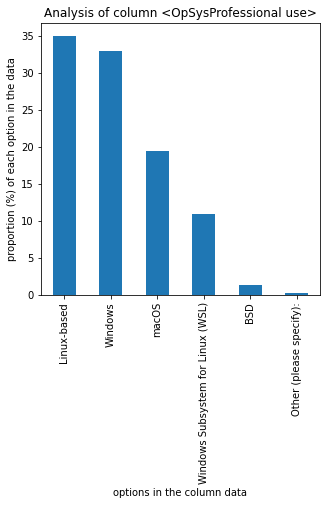

In [120]:
selected_column = 'OpSysProfessional use'
count_plot(df[df['ML']==True], selected_column, column_element_set_dictionary[selected_column])

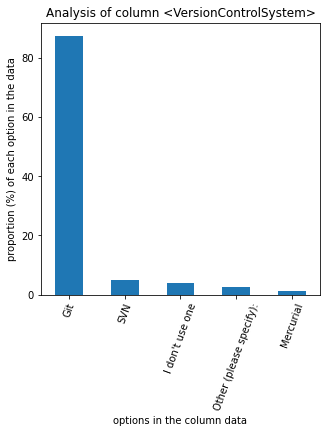

In [108]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'VersionControlSystem'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], rotation=70)

Here it is very clear, that GIT is the most used version managment tool.

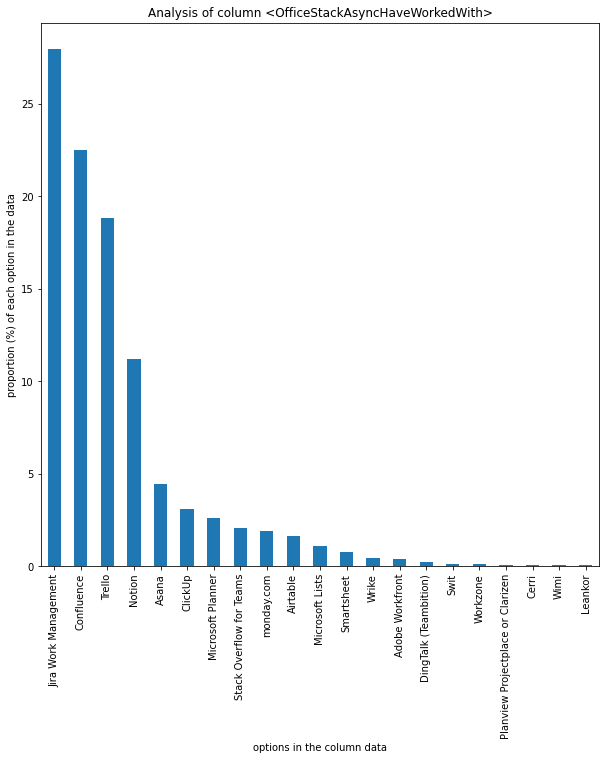

In [111]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'OfficeStackAsyncHaveWorkedWith'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], rotation=90, size = 10)

It is very interesting, that most of the people uses Jira or confluence. The two systems are also very well known here.

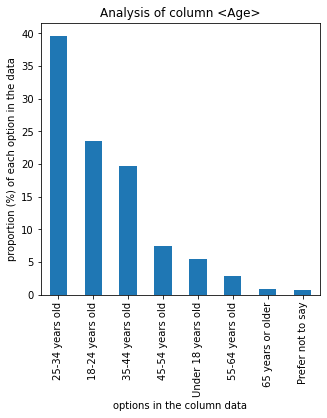

In [113]:
#columns_of_interest = ['MainBranch','Employment','YearsCode','WorkExp','DevType','OrgSize','LanguageHaveWorkedWith','MiscTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith','OpSysProfessional use','OpSysPersonal use','VersionControlSystem','VCInteraction','OfficeStackAsyncHaveWorkedWith','Age' ]
selected_column = 'Age'
count_plot(df, selected_column, column_element_set_dictionary[selected_column], rotation=90)

Most of the people are between 18 and 44 years old. Let´s generate a flag for such group witch is relevant to our questions.

In [114]:
# Generate a flag column.
selected_column = 'Age'
element_list_to_flag = ['25-34 years old','18-24 years old','35-44 years old']
flag_column_name = 'FocusAge'
df = generate_flag_for_column_several_elements(df, selected_column, element_list_to_flag, flag_column_name)

In [115]:
print ('There are ',round (100 * df[df['FocusAge']==True].shape[0]/ df.shape[0], 2),'% people between 18 and 44 years old.')

There are  80.18 % people between 18 and 44 years old.


The mayority of the people are in this relevant age group.